IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from scipy import stats

OVERVIEWING THE DATA

In [2]:
def overview():
    
    data = pd.read_csv("country-wise-average.csv")
    data1 = pd.read_csv("malnutrition-estimates.csv")
    # Print the first 5 lines of data
    print("First 5 lines of data \n\n")
    print(data.head())
    print("\n")
    print(data1.head())
    
    # Print data type
    print("\n\n\nDatatype\n")
    print(data.dtypes)
    print("\n")
    print(data1.dtypes)
    
    # Print number of null values 
    print("\n\n\nNumber of null values\n")
    print(data.isnull().sum())
    print("\n")
    print(data1.isnull().sum())
    
    # Print data summary
    print("\n\n\nData summary\n")
    print(data.describe())
    print("\n")
    print(data1.describe())
    
    # Print data shape
    print("\n\n\nData shape\n")
    print("Data has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n")
    print("Data1 has {} rows and {} columns".format(data1.shape[0], data1.shape[1]))
    
    return data, data1

data, data1 = overview()

First 5 lines of data 


       Country  Income Classification  Severe Wasting    Wasting  Overweight  \
0  AFGHANISTAN                    0.0        3.033333  10.350000    5.125000   
1      ALBANIA                    2.0        4.075000   7.760000   20.800000   
2      ALGERIA                    2.0        2.733333   5.942857   12.833333   
3       ANGOLA                    1.0        2.400000   6.933333    2.550000   
4    ARGENTINA                    2.0        0.200000   2.150000   11.125000   

    Stunting  Underweight  U5 Population ('000s)  
0  47.775000    30.375000            4918.561500  
1  24.160000     7.700000             232.859800  
2  19.571429     7.342857            3565.213143  
3  42.633333    23.600000            3980.054000  
4  10.025000     2.600000            3613.651750  


   Unnamed: 0 ISO code      Country Survey Year  Year  Income Classification  \
0           0      AFG  AFGHANISTAN        1997  1997                      0   
1           1      AFG  AF

DATA PREPROCESSSING

In [3]:
data = data.dropna(subset = ['Wasting', 'Overweight', 'Stunting', 'Underweight'])
data1 = data1.dropna(subset = ['Stunting', 'Underweight', 'Survey Sample (N)', 'Notes'])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[['Severe Wasting']] = imputer.fit_transform(data[['Severe Wasting']])
data1[['Severe Wasting', 'Wasting', 'Overweight']] = imputer.fit_transform(data1[['Severe Wasting', 'Wasting', 'Overweight']])

In [4]:
# Check for NaN
print(data.isnull().sum())
print(data1.isnull().sum())

Country                  0
Income Classification    0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64
Unnamed: 0               0
ISO code                 0
Country                  0
Survey Year              0
Year                     0
Income Classification    0
LDC                      0
LIFD                     0
LLDC or SID2             0
Survey Sample (N)        0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
Notes                    0
Report Author            0
Source                   0
Short Source             0
U5 Population ('000s)    0
dtype: int64


PROCESSING OUTLIER

In [5]:
# Create a function to separate out numerical and categorical data
    ## Using this function to ensure that all non-numerical in a numerical column
    ## and non-categorical in a categorical column is annotated
def cat_variable(df):
    return list(df.select_dtypes(include = ['category', 'object']))

def num_variable(df):
    return list(df.select_dtypes(exclude = ['category', 'object']))

categorical_variable = cat_variable(data)
numerical_variable = num_variable(data)
categorical_variable1 = cat_variable(data1)
numerical_variable1 = num_variable(data1)

# Create a function to process outlier data
def outlier(data):
    z = np.abs(stats.zscore(data[numerical_variable]))
    z_data = data[(z < 3).all(axis=1)] # Remove any outliers with Z-score > 3 or < -3
    return z_data

data = outlier(data)
data1 = outlier(data1)

Text(0.5, 1.0, 'Income level')

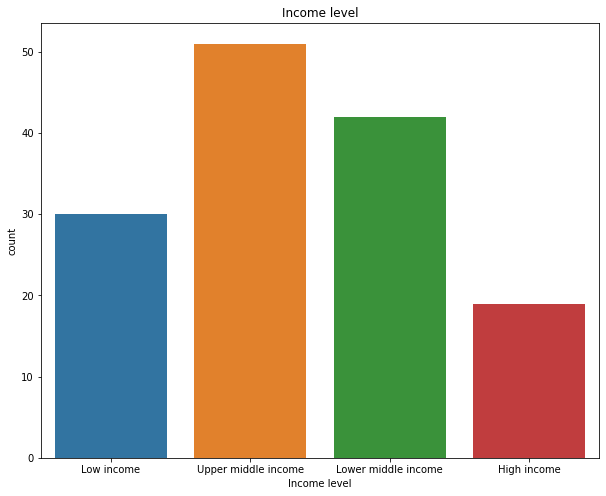

In [6]:
# Replace float to int
data['Income Classification'] = data['Income Classification'].astype('int')

# Create a new column to represent income level
def func(row):
    if row == 0:
        return 'Low income'
    elif row == 1:
        return 'Lower middle income'
    elif row == 2:
        return 'Upper middle income'
    else:
        return 'High income'

data['Income level'] = data.apply(lambda x: func(x['Income Classification']), axis=1)

# Plot countplot
plt.figure(figsize = (10,8))
sns.countplot(data = data, x = 'Income level').set_title('Income level')

VISUALIZATION

Text(0.5, 1.0, 'Severe wasting among different income')

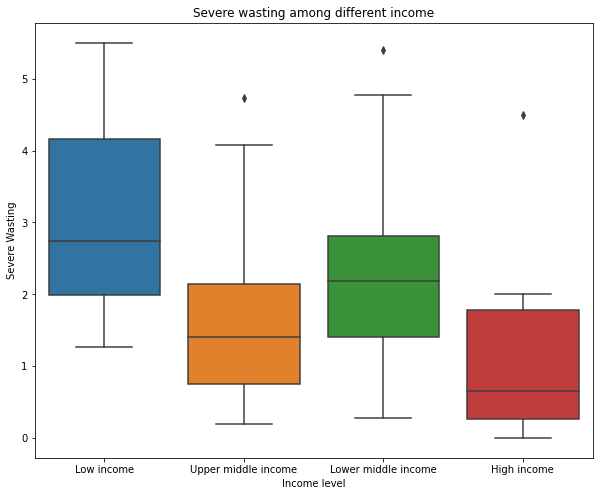

In [7]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data, x = 'Income level', y = 'Severe Wasting').set_title("Severe wasting among different income")

Text(0.5, 1.0, 'Wasting among different income')

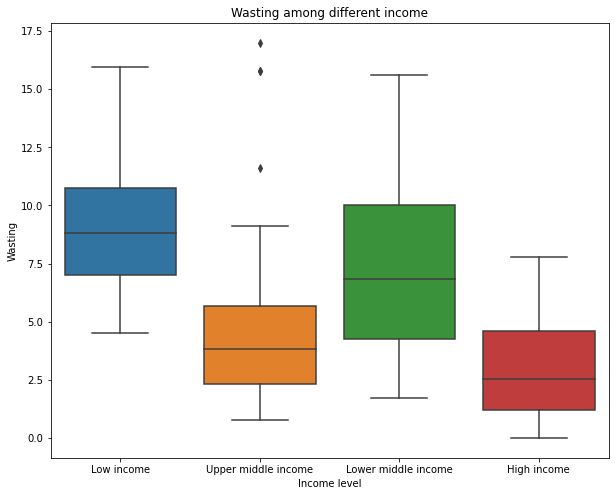

In [8]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data, x = 'Income level', y = 'Wasting').set_title("Wasting among different income")

Text(0.5, 1.0, 'Overweight among different income')

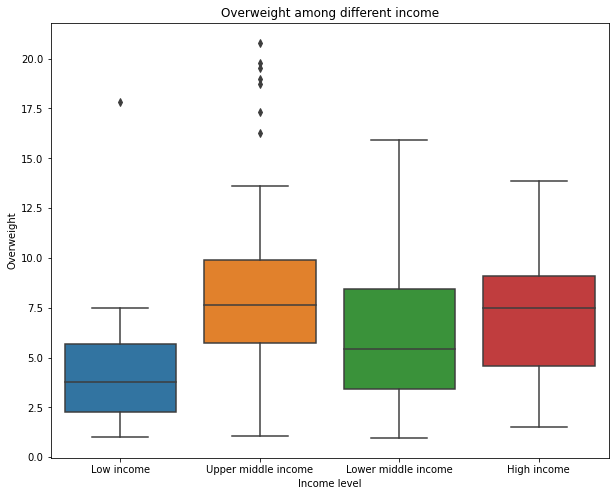

In [9]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data, x = 'Income level', y = 'Overweight').set_title("Overweight among different income")

Text(0.5, 1.0, 'Stunting among different income')

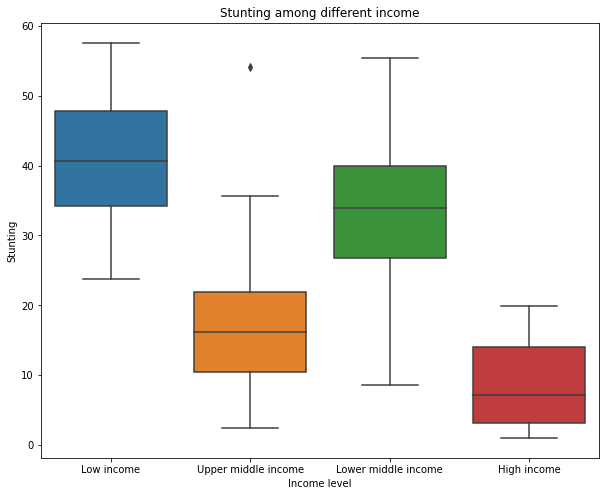

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data, x = 'Income level', y = 'Stunting').set_title("Stunting among different income")

Text(0.5, 1.0, 'Underweight among different income')

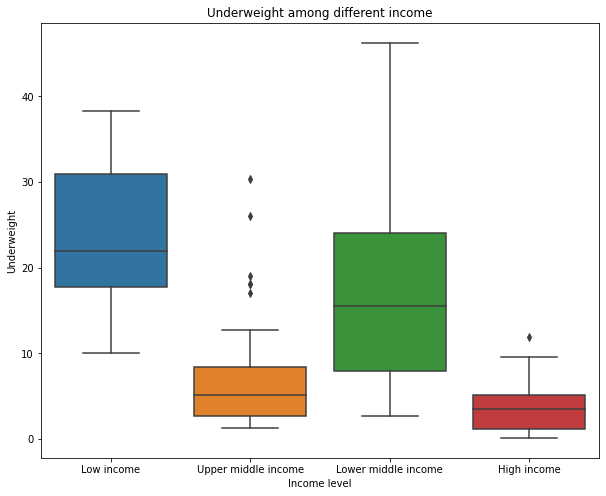

In [11]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data, x = 'Income level', y = 'Underweight').set_title("Underweight among different income")

SORTING

In [12]:
data.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(6)


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Income level
6,AUSTRALIA,3,0.00,0.000000,13.875000,1.000000,0.10,1443.074500,High income
143,UNITED STATES OF AMERICA (THE),3,0.04,0.514286,7.414286,2.914286,0.88,20077.909571,High income
53,GERMANY,3,0.10,0.650000,3.350000,1.500000,0.80,3641.690000,High income
108,REPUBLIC OF KOREA (THE),3,0.15,1.050000,6.750000,2.500000,0.80,2487.097000,High income
66,JAPAN,3,0.20,2.300000,1.500000,7.100000,3.40,5554.144000,High income
4,ARGENTINA,2,0.20,2.150000,11.125000,10.025000,2.60,3613.651750,Upper middle income


In [13]:
data.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Income level
28,CHAD,0,5.500000,15.240000,3.040000,41.260000,31.400000,2024.290400,Low income
32,COMOROS (THE),1,5.400000,10.125000,12.466667,39.125000,19.575000,90.287750,Lower middle income
149,YEMEN,0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000,Low income
129,SYRIAN ARAB REPUBLIC (THE),0,5.050000,9.566667,17.825000,28.550000,10.050000,2476.209333,Low income
132,TIMOR-LESTE,1,4.775000,15.620000,3.650000,55.380000,42.800000,160.444800,Lower middle income
127,SUDAN (THE),1,4.766667,15.400000,2.900000,36.866667,29.933333,5551.013000,Lower middle income
81,MALDIVES,2,4.725000,15.780000,4.660000,32.600000,30.320000,36.045400,Upper middle income
46,ERITREA,0,4.633333,14.600000,1.666667,53.225000,37.550000,407.654500,Low income
100,PAKISTAN,1,4.500000,14.314286,4.757143,46.671429,33.737500,21774.897875,Lower middle income
115,SAUDI ARABIA,3,4.500000,7.350000,3.650000,15.350000,9.400000,2744.397000,High income


TIMESERIES ANALYSIS

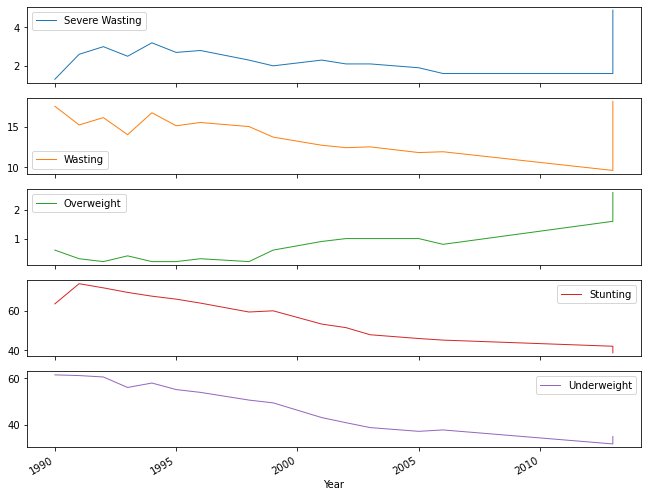

In [14]:
# Choosing the country
bangladesh = data1[data1['Country'] == 'BANGLADESH']

# Indexing the year
bangladesh = bangladesh.set_index('Year')
# Creating time series
axes = bangladesh[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

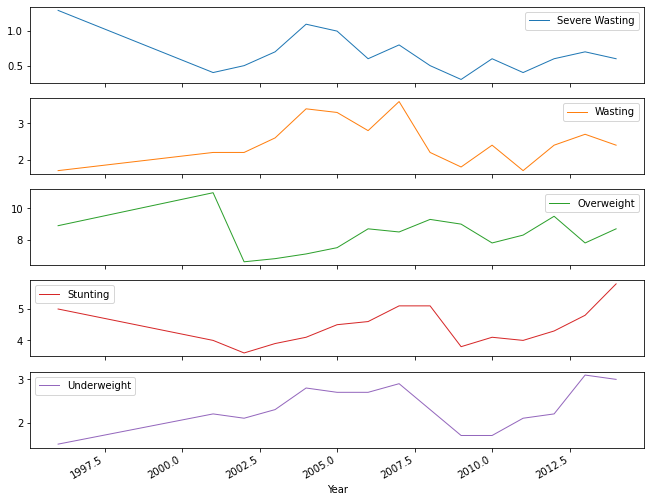

In [15]:
# Choosing the country
kuwait = data1[data1['Country'] == 'KUWAIT']

# Indexing the year
kuwait = kuwait.set_index('Year')
# Creating time series
axes = kuwait[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

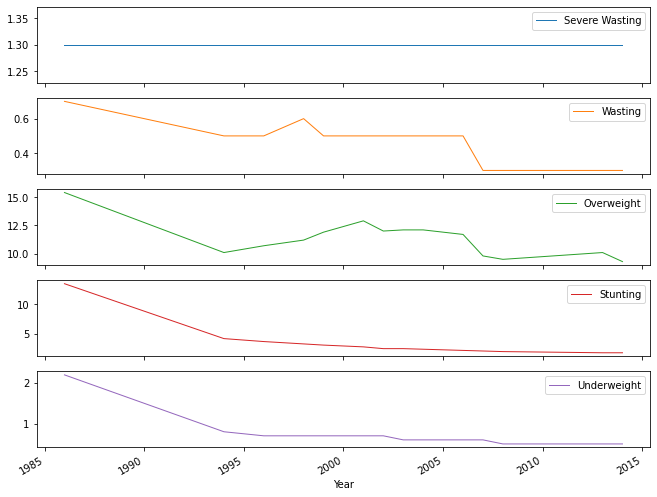

In [16]:
# Choosing the country
chile = data1[data1['Country'] == 'CHILE']

# Indexing the year
chile = chile.set_index('Year')
# Creating time series
axes = chile[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

PAIRPLOT

<Figure size 1152x576 with 0 Axes>

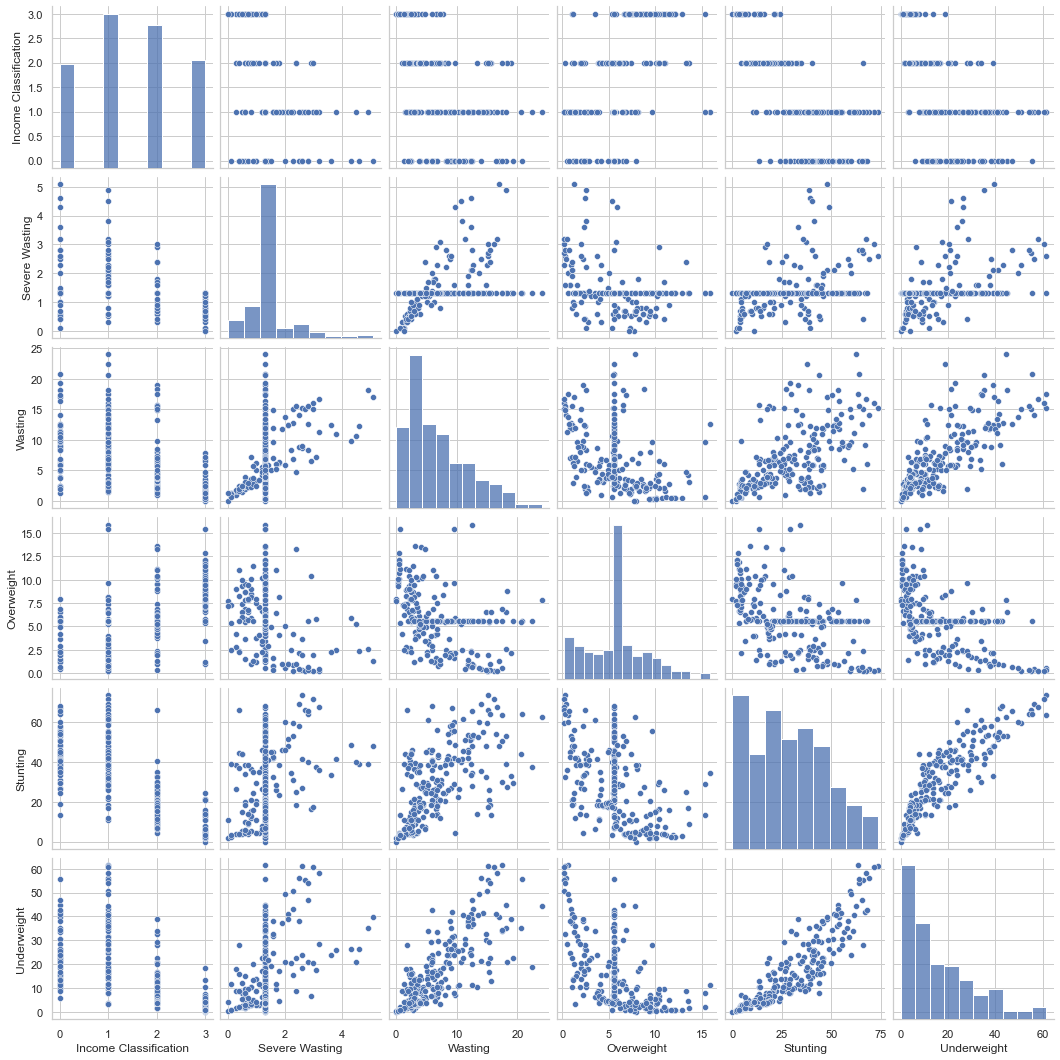

In [17]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["Income Classification","Severe Wasting","Wasting","Overweight","Stunting","Underweight" ]
sns.pairplot(data1[cols], height = 2.5 )
plt.show();

MALNUTRITION ACROSS DIFFERENT INCOME GROUPS

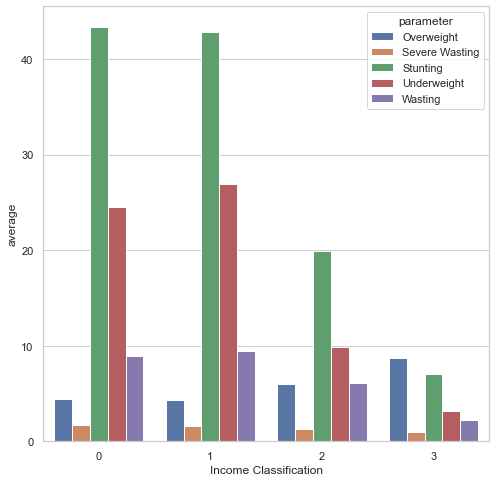

In [18]:
# list of undernutrition parameters
param_list =[ 'Overweight','Severe Wasting','Stunting', 'Underweight', 'Wasting']

data =pd.DataFrame(columns =['parameter','Income Classification','average'])

for param in param_list:
    for i in range(4):
        #value=df.loc[df['Income Classification']==i][param].mean()
        value = data1.loc[data1['Income Classification']==i][param].mean()
        value_dict = {'parameter':param,'Income Classification':i,'average':value}
        data = pd.concat([data, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])
        

plt.figure(figsize =(8,8))
sns.barplot(data =data, x='Income Classification', y='average', hue='parameter')
plt.show()

ANALYSIS OF COUNTRIES WHIC ARE BOTH LDC AND LIFD

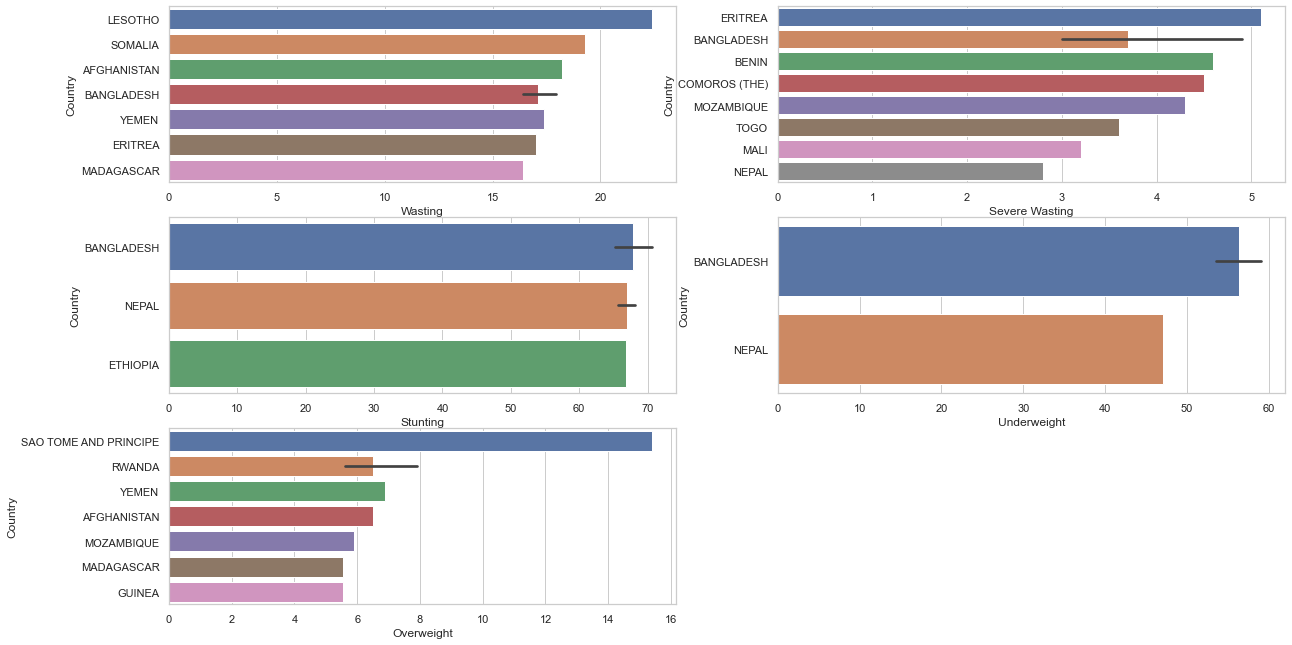

In [19]:
data2 = data1.loc[data1.Year >=2018]
temp = data1.loc[(data1.LDC == 1) & (data1.LIFD ==1)]

# 10 contries in which Stunting percentage is highest
stunting_data1 = temp.sort_values(by='Stunting', ascending =False).head(10)
underweight_data1 =temp.sort_values(by='Underweight', ascending =False).head(10)
overweight_data1=temp.sort_values(by='Overweight', ascending =False).head(10)
severe_wasting_data1=temp.sort_values(by='Severe Wasting', ascending =False).head(10)
wasting_data1 =temp.sort_values(by='Wasting', ascending =False).head(10)

fig =plt.figure(figsize = (20,11))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)

sns.barplot(data =wasting_data1,ax=ax1, y='Country', x='Wasting', orient='h')
sns.barplot(data =severe_wasting_data1,ax=ax2, y='Country', x='Severe Wasting', orient='h')
sns.barplot(data =stunting_data1,ax=ax3, y='Country', x='Stunting', orient='h')
sns.barplot(data =underweight_data1,ax=ax4, y='Country', x='Underweight', orient='h')
sns.barplot(data =overweight_data1,ax=ax5, y='Country', x='Overweight', orient='h')
plt.show()

MALNUTRITION IN LLDCs AND SIDSs

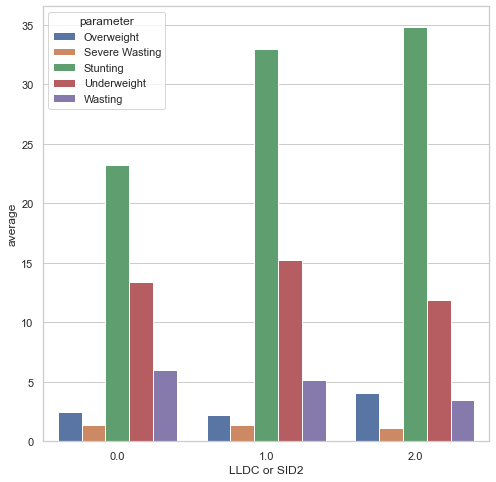

In [20]:
df = data1.copy()
df = df.loc[df.Year >=2017]
data2 =pd.DataFrame(columns =['parameter','LLDC or SID2','average'])

for param in param_list:
    for i in [0.0,1.0,2.0]:
        #value=df.loc[df['Income Classification']==i][param].mean()
        value=df.loc[df['LLDC or SID2']==i][param].mean()
        value_dict = {'parameter':param,'LLDC or SID2':i,'average':value}
        
        data2 = pd.concat([data2, pd.DataFrame(data=[value_dict])])
        #data = pd.concat([data, pd.DataFrame.from_records([value_dict])])
        
#sns.factorplot(data =data, y='average', x='parameter', col='Income Classification', kind='bar')
plt.figure(figsize =(8,8))
sns.barplot(data =data2,  y='average', x='LLDC or SID2', hue='parameter')
plt.show()

FINDING CORRELATION

<AxesSubplot:>

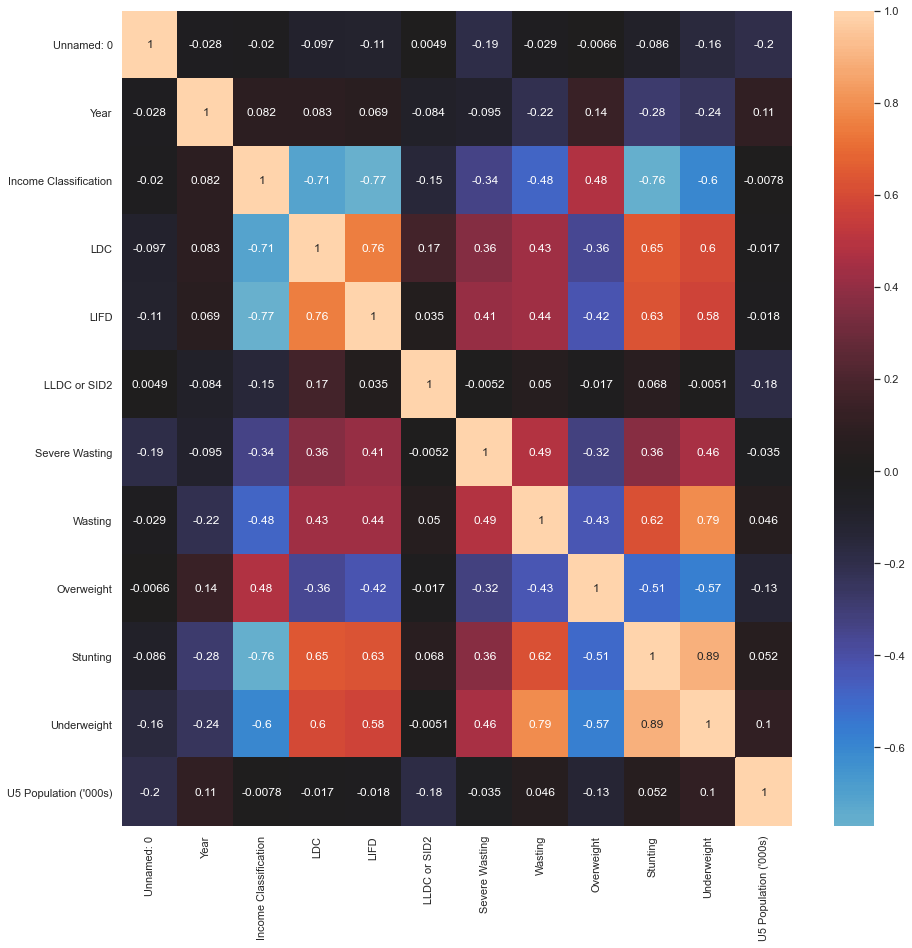

In [21]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(data1.corr(),center=0,annot=True)

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

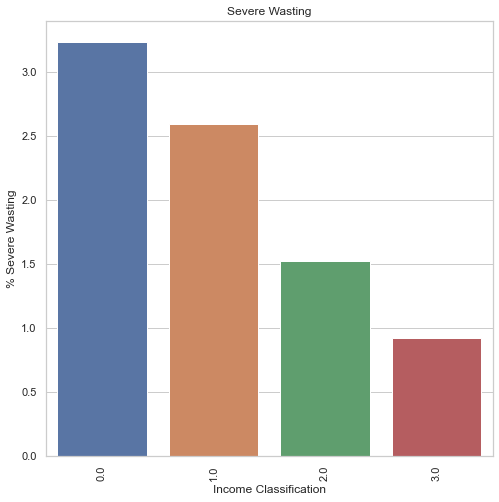

In [23]:
data = pd.read_csv("country-wise-average.csv")
plt.figure(figsize=(8, 8))
x = data.groupby(["Income Classification"])["Severe Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [24]:
data = pd.read_csv("country-wise-average.csv")
#Plotting on the WorldMap using plotly
x = data.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

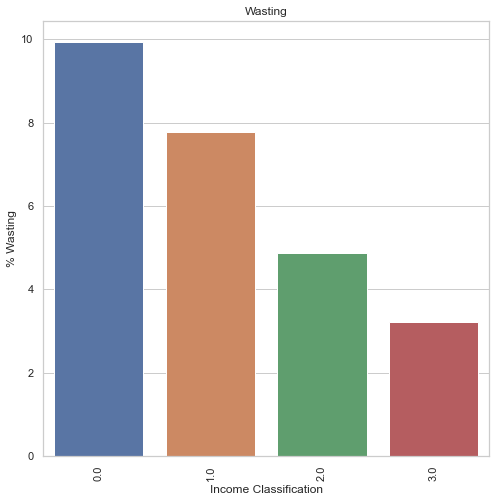

In [25]:
data = pd.read_csv("country-wise-average.csv")
plt.figure(figsize=(8, 8))
x = data.groupby(["Income Classification"])["Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Wasting')
ax.set_ylabel('% Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [26]:
data = pd.read_csv("country-wise-average.csv")
#Plotting on the WorldMap using plotly
x = data.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

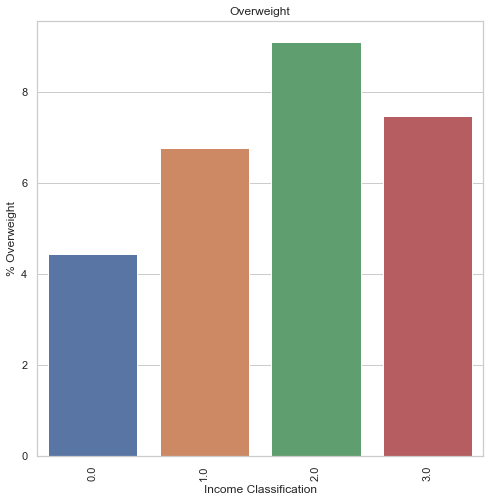

In [27]:
data = pd.read_csv("country-wise-average.csv")
plt.figure(figsize=(8, 8))
x = data.groupby(["Income Classification"])["Overweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Overweight')
ax.set_ylabel('% Overweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [28]:
data = pd.read_csv("country-wise-average.csv")#Plotting on the WorldMap using plotly
#Plotting on the WorldMap using plotly
x = data.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Overweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

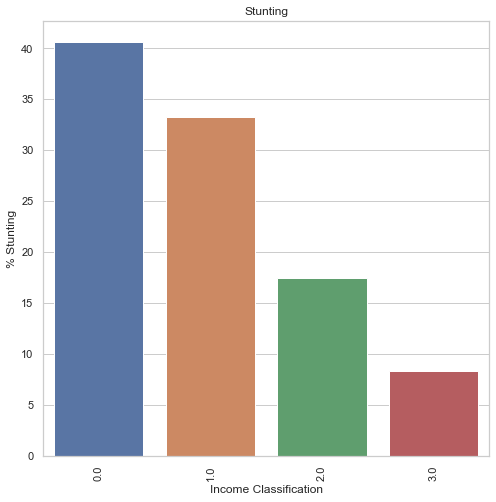

In [29]:
data = pd.read_csv("country-wise-average.csv")
plt.figure(figsize=(8, 8))
x = data.groupby(["Income Classification"])["Stunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Stunting')
ax.set_ylabel('% Stunting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [30]:
data = pd.read_csv("country-wise-average.csv")
#Plotting on the WorldMap using plotly

x = data.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="stunting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

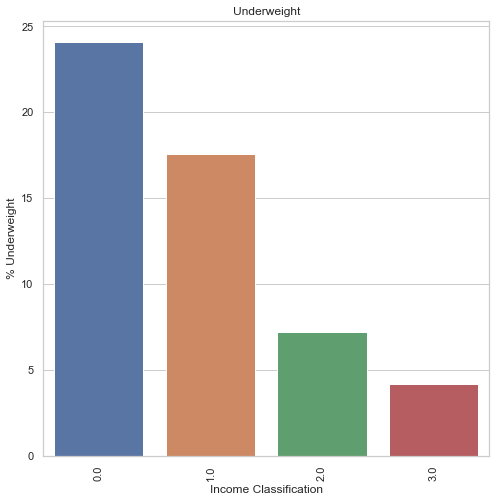

In [31]:
data = pd.read_csv("country-wise-average.csv")
plt.figure(figsize=(8, 8))
x = data.groupby(["Income Classification"])["Underweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Underweight')
ax.set_ylabel('% Underweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)


In [32]:
data = pd.read_csv("country-wise-average.csv")
x = data.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Underweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Underweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()